#### Project Name : Implementation and Analysis of Machine Learning Algorithms on Sloan Digital Sky Survey DR14

# 1. Importing libraries and Dataset

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv("Skyserver_SQL2_27_2018 6_51_39 PM.csv")

In [3]:
data.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


# 2. Knowing about the data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


We have total 17 features and 10000 datapoints in our dataset.

In [5]:
data.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,0.000000e+00,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


In [6]:
data['class'].value_counts()

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64

<AxesSubplot:>

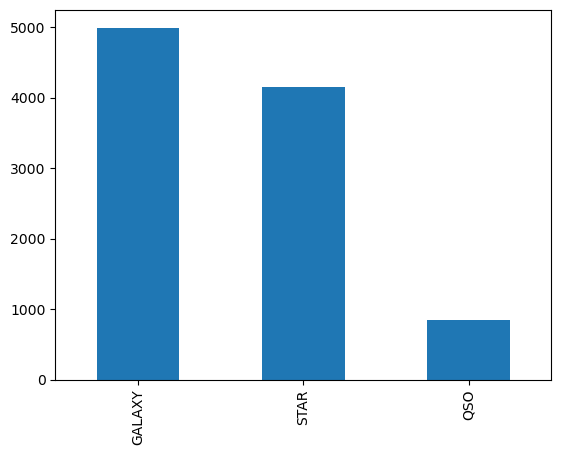

In [7]:
data['class'].value_counts().plot.bar()

In [8]:
data.duplicated().sum()

0

In [9]:
data.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

There is no Nullpoints in our dataset.

In [10]:
data.corr()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
objid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ra,NaN,1.000000,0.003596,0.031238,0.043909,0.047103,0.045731,0.042950,-0.092741,NaN,-0.006294,0.594700,-0.095327,0.030307,-0.095329,-0.086887,0.057485
dec,NaN,0.003596,1.000000,0.035279,0.061875,0.063404,0.058292,0.056870,0.778385,NaN,0.114614,-0.131471,0.088345,0.067021,0.088342,0.066147,0.155012
u,NaN,0.031238,0.035279,1.000000,0.849232,0.692379,0.602630,0.551483,0.038229,NaN,0.009945,0.008548,-0.129429,0.163741,-0.129430,-0.168793,0.011301
g,NaN,0.043909,0.061875,0.849232,1.000000,0.958106,0.907419,0.879622,0.058446,NaN,0.010223,0.014651,-0.054979,0.407576,-0.054981,-0.092772,0.047187
r,NaN,0.047103,0.063404,0.692379,0.958106,1.000000,0.977672,0.969197,0.057261,NaN,0.010747,0.017133,0.019788,0.441080,0.019787,-0.009345,0.061081
i,NaN,0.045731,0.058292,0.602630,0.907419,0.977672,1.000000,0.981507,0.049765,NaN,0.013461,0.019781,0.072960,0.431450,0.072958,0.050896,0.069977
z,NaN,0.042950,0.056870,0.551483,0.879622,0.969197,0.981507,1.000000,0.048252,NaN,0.010930,0.018248,0.112398,0.424034,0.112397,0.095658,0.067980
run,NaN,-0.092741,0.778385,0.038229,0.058446,0.057261,0.049765,0.048252,1.000000,NaN,0.151814,-0.463898,0.093604,0.059056,0.093601,0.070354,0.138566
rerun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Above is the correlation matrix between different variables.

In [11]:
data.columns.values

array(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun',
       'camcol', 'field', 'specobjid', 'class', 'redshift', 'plate',
       'mjd', 'fiberid'], dtype=object)

# 3. Data Pre-processing

In [12]:
data.drop(['objid','camcol','field','specobjid','rerun','run'],axis=1,inplace=True)
data.head()

,ra,dec,u,g,r,i,z,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,STAR,-0.000009,3306,54922,491
1,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,STAR,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,GALAXY,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,STAR,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,STAR,0.000590,3306,54922,512


# 4. EDA

In [13]:
import matplotlib.pyplot as plt

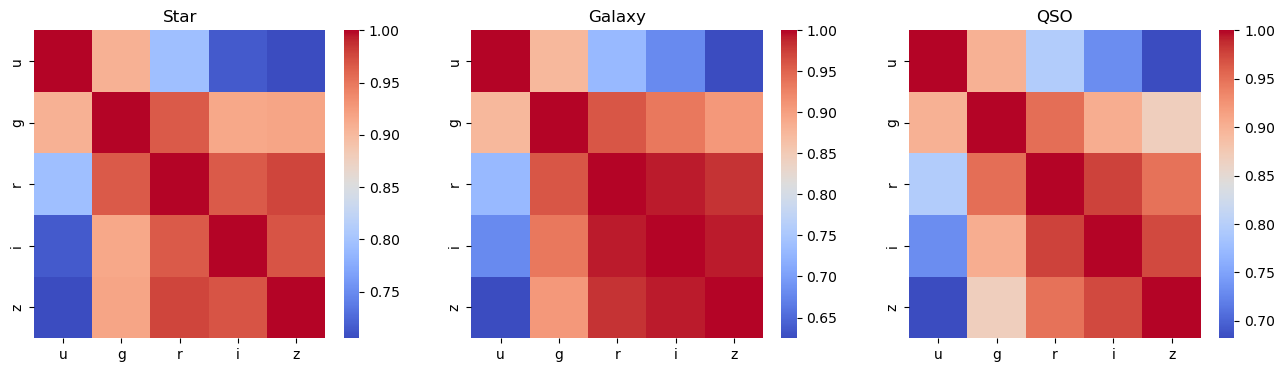

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(16, 4))
fig.set_dpi(100)
ax = sns.heatmap(data[data['class']=='STAR'][['u', 'g', 'r', 'i', 'z']].corr(), ax = axes[0], cmap='coolwarm')
ax.set_title('Star')
ax = sns.heatmap(data[data['class']=='GALAXY'][['u', 'g', 'r', 'i', 'z']].corr(), ax = axes[1], cmap='coolwarm')
ax.set_title('Galaxy')
ax = sns.heatmap(data[data['class']=='QSO'][['u', 'g', 'r', 'i', 'z']].corr(), ax = axes[2], cmap='coolwarm')
ax = ax.set_title('QSO')

<AxesSubplot:xlabel='class', ylabel='g'>

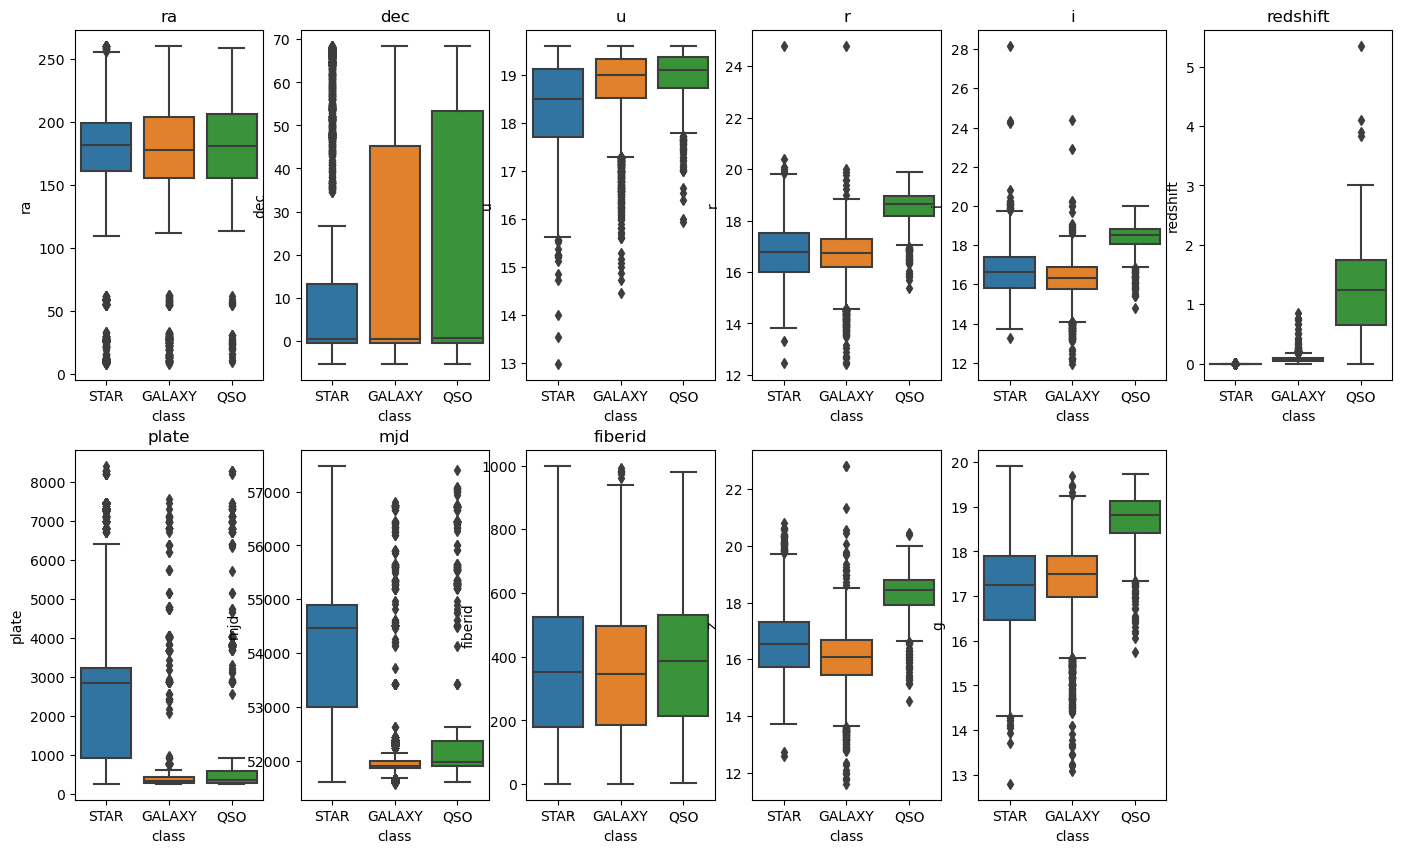

In [15]:
plt.figure(figsize = (17, 10))
ax=plt.subplot(2,6,1)
sns.boxplot(x = data['class'],y =data['ra'])
ax.set_title('ra')
ax=plt.subplot(2,6,2)
sns.boxplot(x = data['class'],y =data['dec'])
ax.set_title('dec')
ax=plt.subplot(2,6,3)
sns.boxplot(x = data['class'],y =data['u'])
ax.set_title('u')
ax=plt.subplot(2,6,4)
sns.boxplot(x = data['class'],y =data['r'])
ax.set_title('r')
ax=plt.subplot(2,6,5)
sns.boxplot(x = data['class'],y =data['i'])
ax.set_title('i')
ax=plt.subplot(2,6,6)
sns.boxplot(x = data['class'],y =data['redshift'])
ax.set_title('redshift')
ax=plt.subplot(2,6,7)
sns.boxplot(x = data['class'],y =data['plate'])
ax.set_title('plate')
ax=plt.subplot(2,6,8)
sns.boxplot(x = data['class'],y =data['mjd'])
ax.set_title('mjd')
ax=plt.subplot(2,6,9)
sns.boxplot(x = data['class'],y = data['fiberid'])
ax.set_title('fiberid')
ax=plt.subplot(2,6,10)
sns.boxplot(x = data['class'],y =data['z'])
ax=plt.subplot(2,6,11)
sns.boxplot(x = data['class'],y =data['g'])

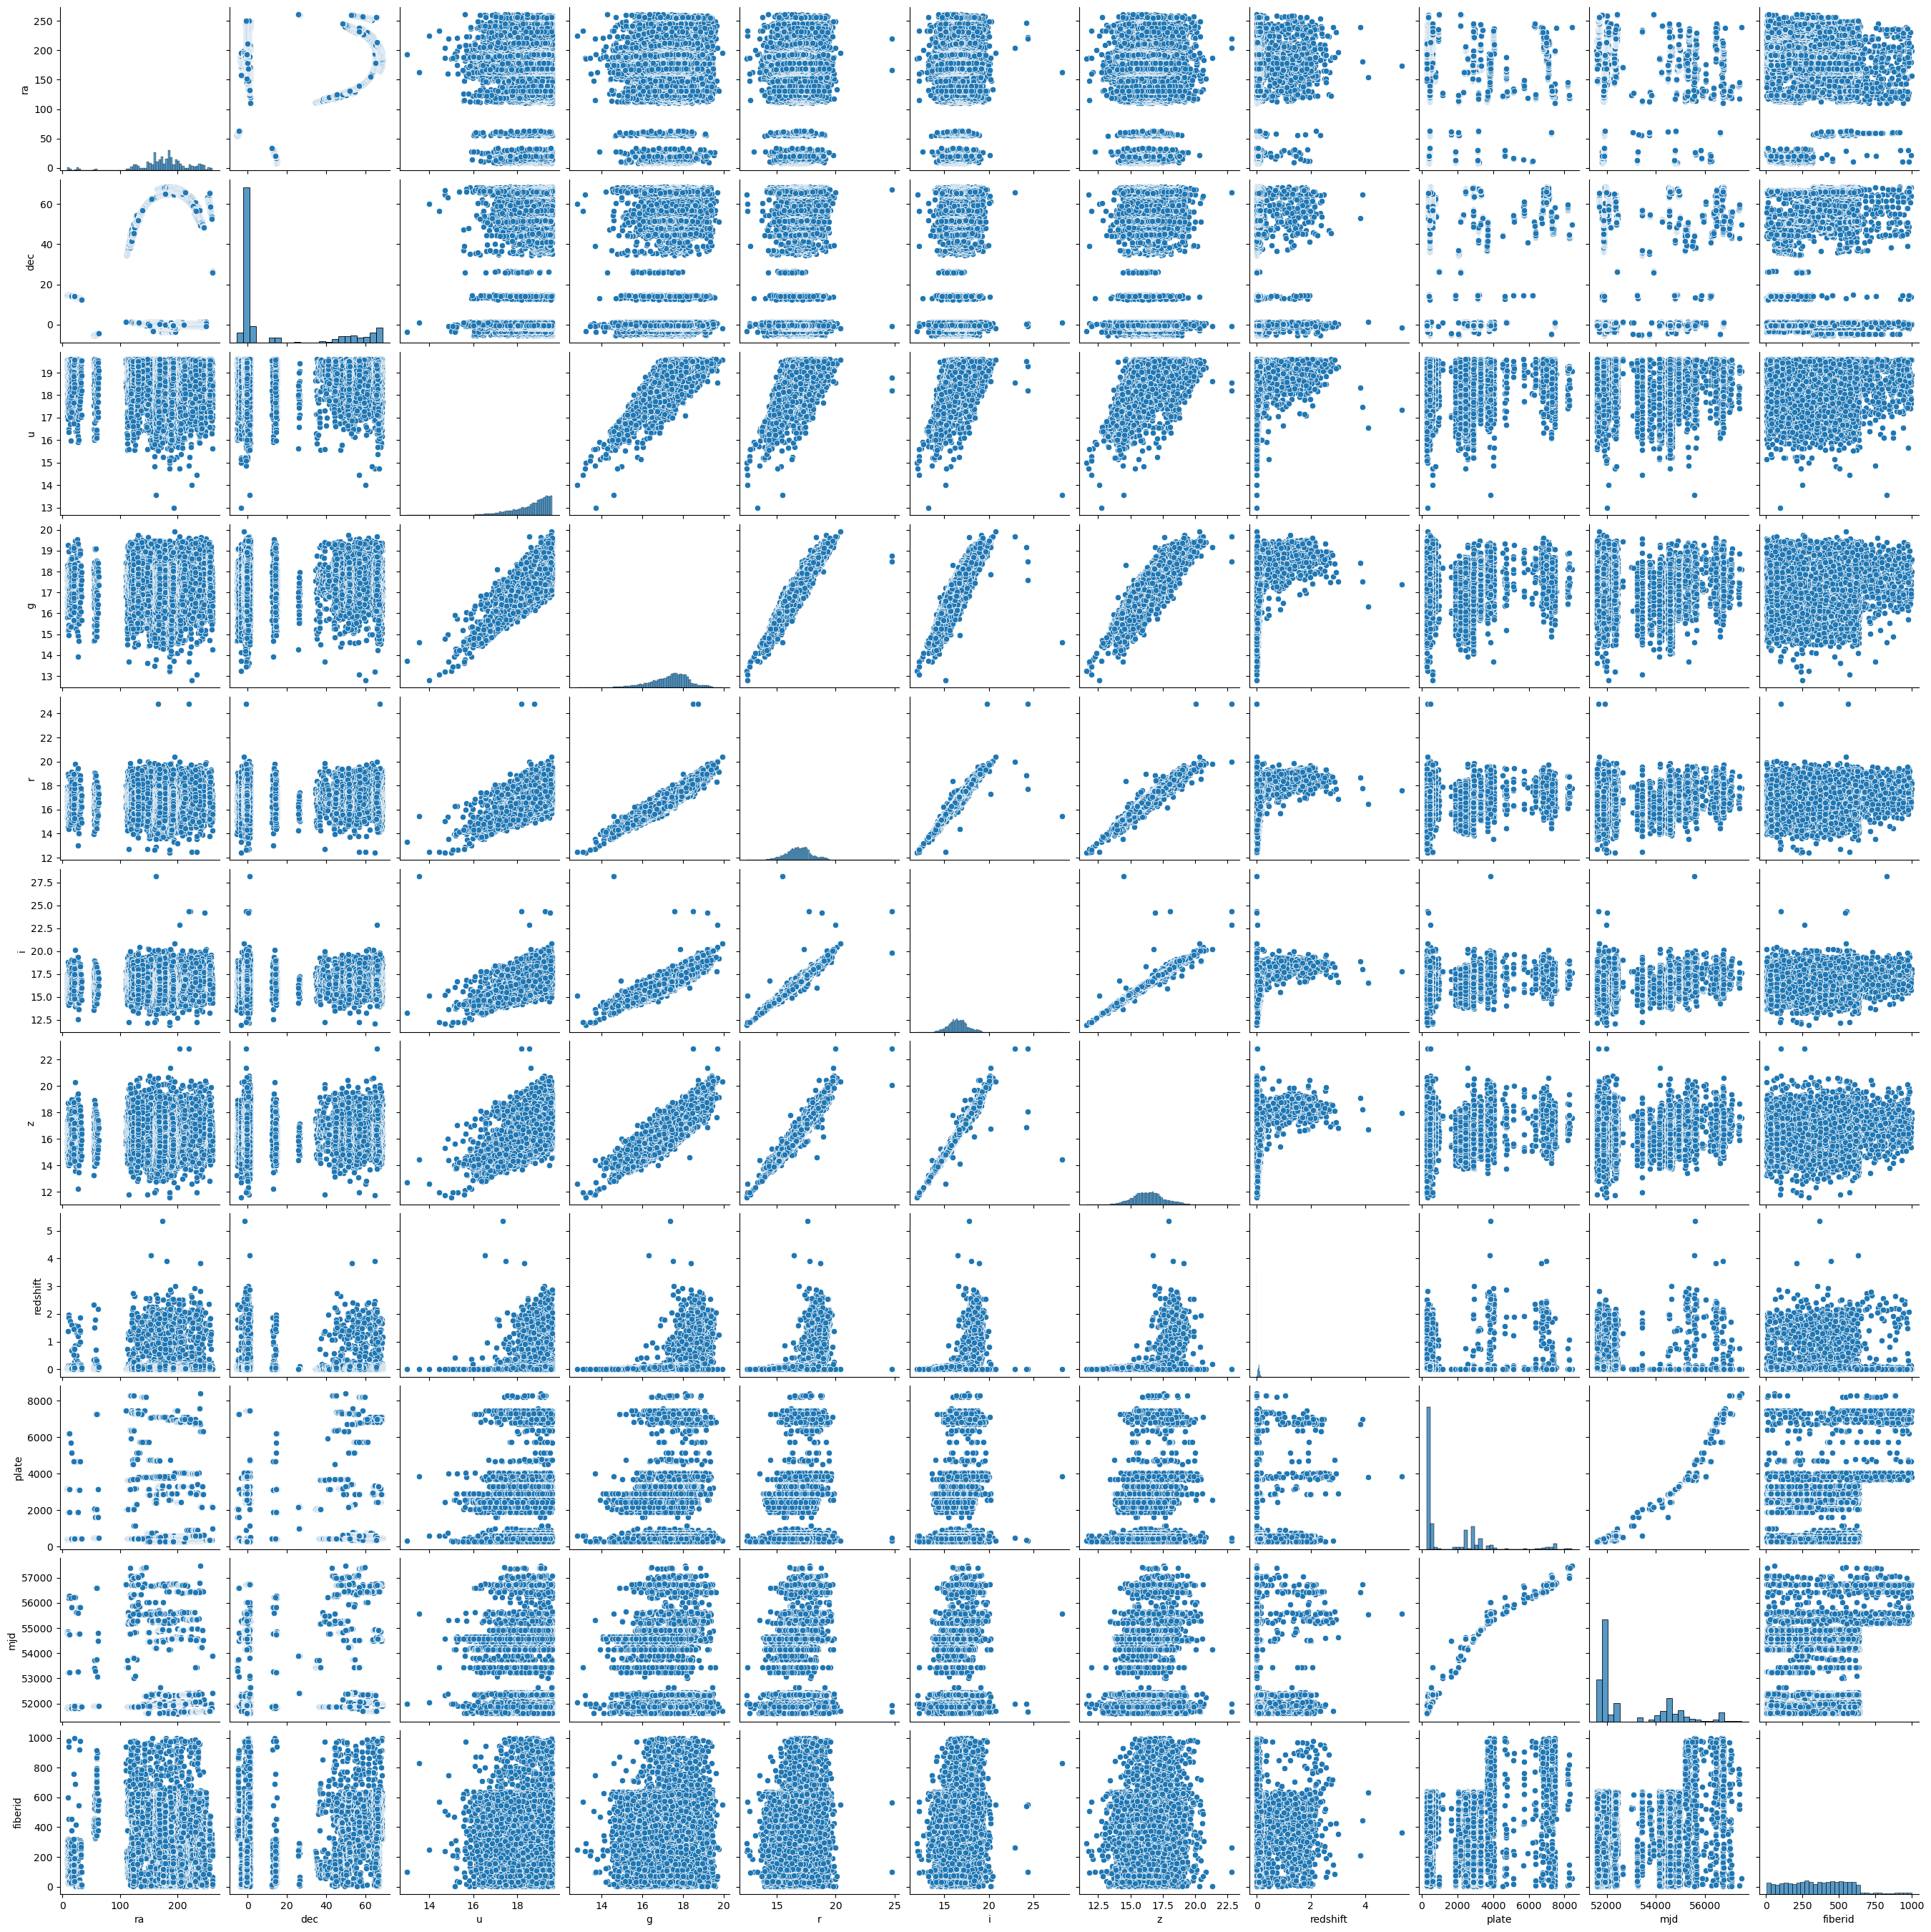

In [16]:
sns.pairplot(data)

# 5. Outliners Removal

In [17]:
#remove Outliers
def outliers(df,ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3-Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    ls = df.index[ (df[ft] < lower_bound) | (df[ft] > upper_bound)]
    
    return ls


index_list = []
for feature in ['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'plate','mjd', 'fiberid']:
    index_list.extend(outliers(data,feature))
    
def remove(df,ls):
    ls = sorted(set(ls))
    df =df.drop(ls)
    return df

In [18]:
data_cleaned = remove(data,index_list)

In [19]:
data_cleaned.shape

(8693, 12)

In [20]:
data.shape

(10000, 12)

<AxesSubplot:xlabel='class', ylabel='g'>

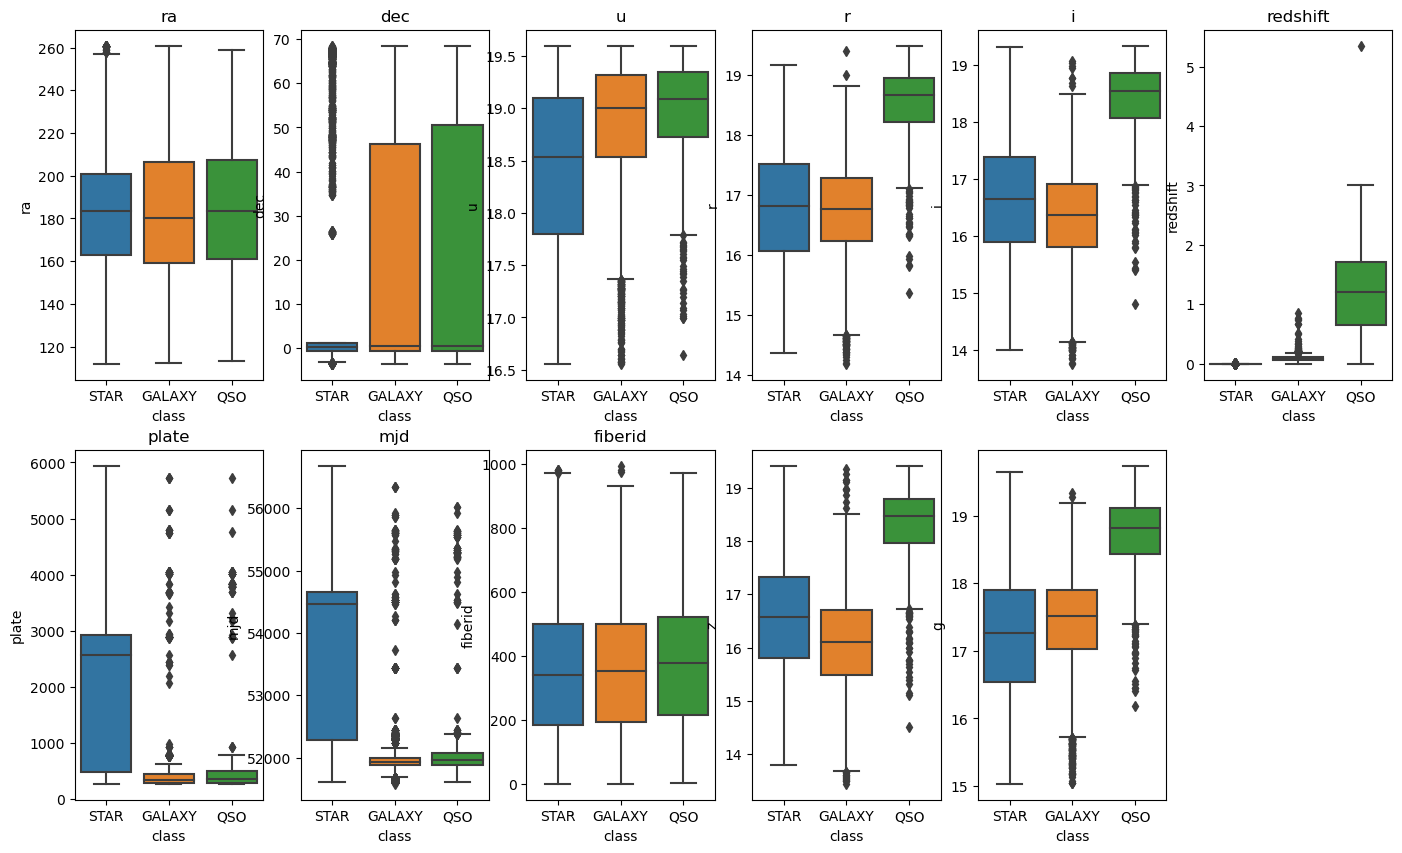

In [21]:
plt.figure(figsize = (17, 10))
ax=plt.subplot(2,6,1)
sns.boxplot(x = data_cleaned['class'],y =data['ra'])
ax.set_title('ra')
ax=plt.subplot(2,6,2)
sns.boxplot(x = data_cleaned['class'],y =data['dec'])
ax.set_title('dec')
ax=plt.subplot(2,6,3)
sns.boxplot(x = data_cleaned['class'],y =data['u'])
ax.set_title('u')
ax=plt.subplot(2,6,4)
sns.boxplot(x = data_cleaned['class'],y =data['r'])
ax.set_title('r')
ax=plt.subplot(2,6,5)
sns.boxplot(x = data_cleaned['class'],y =data['i'])
ax.set_title('i')
ax=plt.subplot(2,6,6)
sns.boxplot(x = data_cleaned['class'],y =data['redshift'])
ax.set_title('redshift')
ax=plt.subplot(2,6,7)
sns.boxplot(x = data_cleaned['class'],y =data['plate'])
ax.set_title('plate')
ax=plt.subplot(2,6,8)
sns.boxplot(x = data_cleaned['class'],y =data['mjd'])
ax.set_title('mjd')
ax=plt.subplot(2,6,9)
sns.boxplot(x = data_cleaned['class'],y = data['fiberid'])
ax.set_title('fiberid')
ax=plt.subplot(2,6,10)
sns.boxplot(x = data_cleaned['class'],y =data['z'])
ax=plt.subplot(2,6,11)
sns.boxplot(x = data_cleaned['class'],y =data['g'])

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
labelencoder = LabelEncoder()
data_cleaned['class'] = labelencoder.fit_transform(data_cleaned['class'])
data_cleaned.head()

,ra,dec,u,g,r,i,z,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,2,-0.000009,3306,54922,491
1,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,2,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,0,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,2,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,2,0.000590,3306,54922,512


# -----------------------------------

In [24]:
data_cleaned['redshift'].describe() #Hypothesis testing

count    8693.000000
mean        0.143866
std         0.375930
min        -0.004136
25%         0.000141
50%         0.050446
75%         0.095278
max         5.353854
Name: redshift, dtype: float64

# ------------------------------------------

In [25]:
data_cleaned['class'].value_counts()

0    4679
2    3287
1     727
Name: class, dtype: int64

In [26]:
data_cleaned.corrwith(data_cleaned['class'],axis=0)

ra         -0.001130
dec        -0.074572
u          -0.279941
g          -0.091705
r           0.066195
i           0.167219
z           0.239449
class       1.000000
redshift   -0.058546
plate       0.675018
mjd         0.674731
fiberid     0.001559
dtype: float64

<AxesSubplot:>

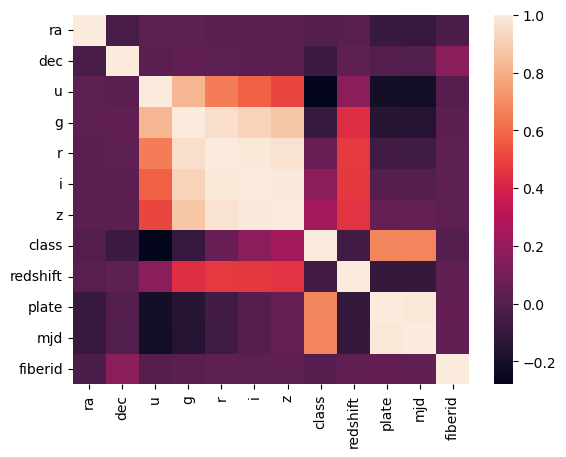

In [27]:
sns.heatmap(data_cleaned.corr())

In [28]:
X = data_cleaned.drop('class',axis=1) 
y = data_cleaned['class']

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.2,random_state=1)

In [30]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# 5.1 SVM

In [31]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

In [32]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,accuracy_score,classification_report
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[3683    9   77]
 [  28  547    0]
 [  24    3 2584]]


In [33]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      3769
           1       0.98      0.95      0.96       575
           2       0.97      0.99      0.98      2611

    accuracy                           0.98      6955
   macro avg       0.98      0.97      0.98      6955
weighted avg       0.98      0.98      0.98      6955



In [34]:
print("Accuracy score: ",accuracy_score(y_test,y_pred))

Accuracy score:  0.9797268152408339


# 5.2 Naive Bayes

In [35]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred1 =  nb.predict(X_test)

In [36]:
print("Accuracy score: ",accuracy_score(y_test,y_pred1))

Accuracy score:  0.9667864845434939


In [37]:
cm1 = confusion_matrix(y_test,y_pred1)
cm1

array([[3657,  101,   11],
       [  36,  539,    0],
       [  42,   41, 2528]], dtype=int64)

In [38]:
cr1 = classification_report(y_test,y_pred1)
print(cr1)

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      3769
           1       0.79      0.94      0.86       575
           2       1.00      0.97      0.98      2611

    accuracy                           0.97      6955
   macro avg       0.92      0.96      0.94      6955
weighted avg       0.97      0.97      0.97      6955



# 5.3 Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf.fit(X_train, y_train)
y_pred2=rf.predict(X_test)

In [40]:
print("Accuracy score: ",accuracy_score(y_test,y_pred2))

Accuracy score:  0.987922358015816


In [41]:
cm2 = confusion_matrix(y_test,y_pred2)
cm2

array([[3741,   14,   14],
       [  50,  525,    0],
       [   6,    0, 2605]], dtype=int64)

In [42]:
cr2 = classification_report(y_test,y_pred2)
print(cr2)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3769
           1       0.97      0.91      0.94       575
           2       0.99      1.00      1.00      2611

    accuracy                           0.99      6955
   macro avg       0.98      0.97      0.98      6955
weighted avg       0.99      0.99      0.99      6955



# 5.4 KNN

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred3 = knn.predict(X_test)

In [44]:
print("Accuracy score: ",accuracy_score(y_test,y_pred3))

Accuracy score:  0.8969086987778576


In [45]:
cm3 = confusion_matrix(y_test,y_pred3)
print(cm3)

[[3559    9  201]
 [  59  497   19]
 [ 428    1 2182]]


In [46]:
cr3 = classification_report(y_test,y_pred3)
print(cr3)

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      3769
           1       0.98      0.86      0.92       575
           2       0.91      0.84      0.87      2611

    accuracy                           0.90      6955
   macro avg       0.92      0.88      0.90      6955
weighted avg       0.90      0.90      0.90      6955



# 6. OverSampling

In [47]:
from imblearn.over_sampling import SMOTE
over_sampler = SMOTE(sampling_strategy="minority")
X_oversampled, Y_oversampled = over_sampler.fit_resample(X_train, y_train)

<AxesSubplot:>

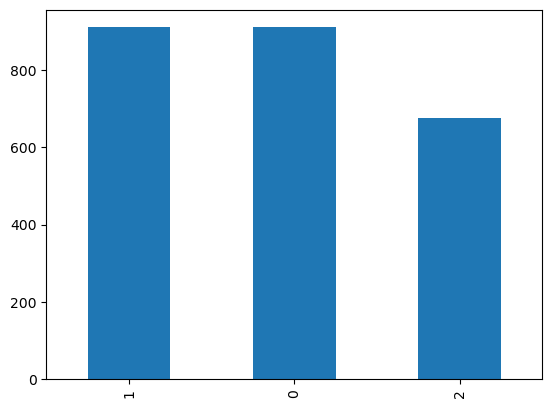

In [48]:
Y_oversampled.value_counts().plot.bar()

# 6.1 SVM

In [49]:
svm = SVC(kernel="rbf")
svm.fit(X_oversampled, Y_oversampled)
y_pred_os = svm.predict(X_test)

In [50]:
cm_os = confusion_matrix(y_test,y_pred_os)
print(cm_os)

[[3603   18  148]
 [  23  550    2]
 [ 286    6 2319]]


In [51]:
cr_os = classification_report(y_test,y_pred_os)
print(cr_os)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3769
           1       0.96      0.96      0.96       575
           2       0.94      0.89      0.91      2611

    accuracy                           0.93      6955
   macro avg       0.94      0.93      0.94      6955
weighted avg       0.93      0.93      0.93      6955



In [52]:
print("Accuracy score: ",accuracy_score(y_test,y_pred_os))

Accuracy score:  0.9305535585909418


# 6.2 Naive Bayes

In [53]:
nb = GaussianNB()
nb.fit(X_oversampled, Y_oversampled)
y_pred1_os =  nb.predict(X_test)

In [54]:
print("Accuracy score: ",accuracy_score(y_test,y_pred1_os))

Accuracy score:  0.9624730409777139


In [55]:
cm1_os = confusion_matrix(y_test,y_pred1_os)
cm1_os

array([[3651,  107,   11],
       [  31,  544,    0],
       [  42,   70, 2499]], dtype=int64)

In [56]:
cr1_os = classification_report(y_test,y_pred1_os)
print(cr1_os)

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      3769
           1       0.75      0.95      0.84       575
           2       1.00      0.96      0.98      2611

    accuracy                           0.96      6955
   macro avg       0.91      0.96      0.93      6955
weighted avg       0.97      0.96      0.96      6955



# 6.3 Random Forest

In [57]:
rf_os = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf_os.fit(X_oversampled, Y_oversampled)
y_pred2_os=rf_os.predict(X_test)

In [58]:
print("Accuracy score: ",accuracy_score(y_test,y_pred2_os))

Accuracy score:  0.987491013659238


In [59]:
cm2_os = confusion_matrix(y_test,y_pred2_os)
print(cm2_os)

[[3721   34   14]
 [  34  541    0]
 [   4    1 2606]]


In [60]:
cr2_os = classification_report(y_test,y_pred2_os)
print(cr2_os)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3769
           1       0.94      0.94      0.94       575
           2       0.99      1.00      1.00      2611

    accuracy                           0.99      6955
   macro avg       0.97      0.98      0.97      6955
weighted avg       0.99      0.99      0.99      6955



# 6.4 KNN

In [61]:
from sklearn.neighbors import KNeighborsClassifier
knn_os=KNeighborsClassifier(n_neighbors=5)
knn_os.fit(X_oversampled, Y_oversampled)
y_pred3_os = knn.predict(X_test)
print("Accuracy score: ",accuracy_score(y_test,y_pred3_os))

Accuracy score:  0.8969086987778576


In [62]:
cm3_os = confusion_matrix(y_test,y_pred3_os)
print(cm3_os)
cr3_os = classification_report(y_test,y_pred3_os)
print(cr3_os)

[[3559    9  201]
 [  59  497   19]
 [ 428    1 2182]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      3769
           1       0.98      0.86      0.92       575
           2       0.91      0.84      0.87      2611

    accuracy                           0.90      6955
   macro avg       0.92      0.88      0.90      6955
weighted avg       0.90      0.90      0.90      6955



# 7. Under Sampling

In [63]:
from imblearn.under_sampling import RandomUnderSampler,TomekLinks

In [64]:
under_sampler = RandomUnderSampler(sampling_strategy="majority")
X_undersampled, Y_undersampled = under_sampler.fit_resample(X_train,y_train)

<AxesSubplot:>

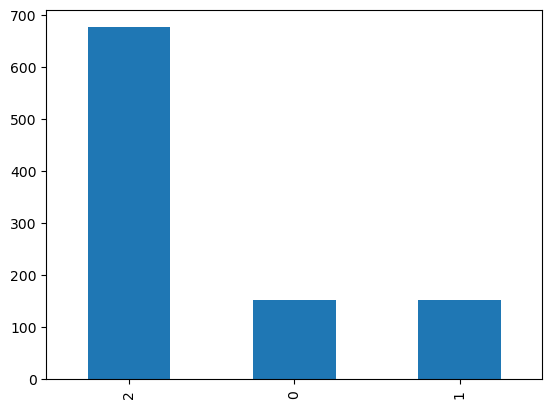

In [65]:
Y_undersampled.value_counts().plot.bar()

# 7.1 SVM

In [66]:
svm_us = SVC(kernel="linear")
svm_us.fit(X_undersampled, Y_undersampled)
y_pred_us = svm.predict(X_test)
print("Accuracy score: ",accuracy_score(y_test,y_pred_us))

Accuracy score:  0.9305535585909418


In [67]:
cm_us = confusion_matrix(y_test,y_pred_us)
print(cm_us)

[[3603   18  148]
 [  23  550    2]
 [ 286    6 2319]]


In [68]:
cr_us = classification_report(y_test,y_pred_us)
print(cr_us)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3769
           1       0.96      0.96      0.96       575
           2       0.94      0.89      0.91      2611

    accuracy                           0.93      6955
   macro avg       0.94      0.93      0.94      6955
weighted avg       0.93      0.93      0.93      6955



# 7.2 Naive Bayes

In [69]:
nb_us = GaussianNB()
nb_us.fit(X_undersampled, Y_undersampled)
y_pred1_us =  nb_us.predict(X_test)
print("Accuracy score: ",accuracy_score(y_test,y_pred1_us))

Accuracy score:  0.9706685837526959


In [70]:
cm1_us = confusion_matrix(y_test,y_pred1_us)
cm1_us

array([[3648,  109,   12],
       [  31,  544,    0],
       [  11,   41, 2559]], dtype=int64)

In [71]:
cr1_us = classification_report(y_test,y_pred1_us)
print(cr1_us)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3769
           1       0.78      0.95      0.86       575
           2       1.00      0.98      0.99      2611

    accuracy                           0.97      6955
   macro avg       0.92      0.96      0.94      6955
weighted avg       0.97      0.97      0.97      6955



# 7.3 Random Forest

In [72]:
rf_us = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf_us.fit(X_undersampled, Y_undersampled)
y_pred2_us=rf_us.predict(X_test)
print("Accuracy score: ",accuracy_score(y_test,y_pred2_us))

Accuracy score:  0.9746944644140906


In [73]:
cm2_us = confusion_matrix(y_test,y_pred2_us)
print(cm2_us)

[[3633   82   54]
 [  33  541    1]
 [   3    3 2605]]


In [74]:
cr2_us = classification_report(y_test,y_pred2_us)
print(cr2_us)

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      3769
           1       0.86      0.94      0.90       575
           2       0.98      1.00      0.99      2611

    accuracy                           0.97      6955
   macro avg       0.94      0.97      0.96      6955
weighted avg       0.98      0.97      0.97      6955



# 7.4 KNN

In [75]:
knn_us=KNeighborsClassifier(n_neighbors=5)
knn_us.fit(X_undersampled, Y_undersampled)
y_pred3_us = knn.predict(X_test)
print("Accuracy score: ",accuracy_score(y_test,y_pred3_us))

Accuracy score:  0.8969086987778576


In [76]:
cm3_us = confusion_matrix(y_test,y_pred3_us)
print(cm3_us)


[[3559    9  201]
 [  59  497   19]
 [ 428    1 2182]]


In [77]:
cr3_us = classification_report(y_test,y_pred3_us)
print(cr3_us)

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      3769
           1       0.98      0.86      0.92       575
           2       0.91      0.84      0.87      2611

    accuracy                           0.90      6955
   macro avg       0.92      0.88      0.90      6955
weighted avg       0.90      0.90      0.90      6955



# 8. Final Analysis

In [78]:
from sklearn import metrics

In [79]:
Evaluation=pd.DataFrame(['SVM'],columns=['Algorithm'])
Evaluation.loc[0,'Precision']=metrics.precision_score(y_test, y_pred, average='micro')
Evaluation.loc[0,'Recall']=metrics.recall_score(y_test, y_pred, average='micro')
Evaluation.loc[0,'F1 Score']=metrics.f1_score(y_test, y_pred, average='micro')
Evaluation.loc[0,'Accuracy']=metrics.accuracy_score(y_test,y_pred)
Evaluation.loc[1,'Algorithm']='Naive_Bayes'
Evaluation.loc[1,'Precision']=metrics.precision_score(y_test, y_pred1, average='micro')
Evaluation.loc[1,'Recall']=metrics.recall_score(y_test, y_pred1, average='micro')
Evaluation.loc[1,'F1 Score']=metrics.f1_score(y_test, y_pred1, average='micro')
Evaluation.loc[1,'Accuracy']=metrics.accuracy_score(y_test,y_pred1)
Evaluation.loc[2,'Algorithm']='Random Forest'
Evaluation.loc[2,'Precision']=metrics.precision_score(y_test, y_pred2, average='micro')
Evaluation.loc[2,'Recall']=metrics.recall_score(y_test, y_pred2, average='micro')
Evaluation.loc[2,'F1 Score']=metrics.f1_score(y_test, y_pred2, average='micro')
Evaluation.loc[2,'Accuracy']=metrics.accuracy_score(y_test,y_pred2)
Evaluation.loc[3,'Algorithm']='KNN'
Evaluation.loc[3,'Precision']=metrics.precision_score(y_test, y_pred3, average='micro')
Evaluation.loc[3,'Recall']=metrics.recall_score(y_test, y_pred3, average='micro')
Evaluation.loc[3,'F1 Score']=metrics.f1_score(y_test, y_pred3, average='micro')
Evaluation.loc[3,'Accuracy']=metrics.accuracy_score(y_test,y_pred3)
display(Evaluation.loc[:].style.highlight_max(subset=['Precision', 'Accuracy','Recall','F1 Score'], color='green'))

,Algorithm,Precision,Recall,F1 Score,Accuracy
0,SVM,0.979727,0.979727,0.979727,0.979727
1,Naive_Bayes,0.966786,0.966786,0.966786,0.966786
2,Random Forest,0.987922,0.987922,0.987922,0.987922
3,KNN,0.896909,0.896909,0.896909,0.896909


In [80]:
Evaluation1=pd.DataFrame(['SVM'],columns=['Algorithm'])
Evaluation1.loc[0,'Precision']=metrics.precision_score(y_test, y_pred_os, average='micro')
Evaluation1.loc[0,'Recall']=metrics.recall_score(y_test, y_pred_os, average='micro')
Evaluation1.loc[0,'F1 Score']=metrics.f1_score(y_test, y_pred_os, average='micro')
Evaluation1.loc[0,'Accuracy']=metrics.accuracy_score(y_test,y_pred_os)
Evaluation1.loc[1,'Algorithm']='Naive_Bayes'
Evaluation1.loc[1,'Precision']=metrics.precision_score(y_test, y_pred1_os, average='micro')
Evaluation1.loc[1,'Recall']=metrics.recall_score(y_test, y_pred1_os, average='micro')
Evaluation1.loc[1,'F1 Score']=metrics.f1_score(y_test, y_pred1_os, average='micro')
Evaluation1.loc[1,'Accuracy']=metrics.accuracy_score(y_test,y_pred1_os)
Evaluation1.loc[2,'Algorithm']='Random Forest'
Evaluation1.loc[2,'Precision']=metrics.precision_score(y_test, y_pred2_os, average='micro')
Evaluation1.loc[2,'Recall']=metrics.recall_score(y_test, y_pred2_os, average='micro')
Evaluation1.loc[2,'F1 Score']=metrics.f1_score(y_test, y_pred2_os, average='micro')
Evaluation1.loc[2,'Accuracy']=metrics.accuracy_score(y_test,y_pred2_os)
Evaluation1.loc[3,'Algorithm']='KNN'
Evaluation1.loc[3,'Precision']=metrics.precision_score(y_test, y_pred3_os, average='micro')
Evaluation1.loc[3,'Recall']=metrics.recall_score(y_test, y_pred3_os, average='micro')
Evaluation1.loc[3,'F1 Score']=metrics.f1_score(y_test, y_pred3_os, average='micro')
Evaluation1.loc[3,'Accuracy']=metrics.accuracy_score(y_test,y_pred3_os)
print("OverSampling")
display(Evaluation1.loc[:].style.highlight_max(subset=['Precision', 'Accuracy','Recall','F1 Score'], color='green'))

OverSampling


,Algorithm,Precision,Recall,F1 Score,Accuracy
0,SVM,0.930554,0.930554,0.930554,0.930554
1,Naive_Bayes,0.962473,0.962473,0.962473,0.962473
2,Random Forest,0.987491,0.987491,0.987491,0.987491
3,KNN,0.896909,0.896909,0.896909,0.896909


In [81]:
Evaluation2=pd.DataFrame(['SVM'],columns=['Algorithm'])
Evaluation2.loc[0,'Precision']=metrics.precision_score(y_test, y_pred_us, average='micro')
Evaluation2.loc[0,'Recall']=metrics.recall_score(y_test, y_pred_us, average='micro')
Evaluation2.loc[0,'F1 Score']=metrics.f1_score(y_test, y_pred_us, average='micro')
Evaluation2.loc[0,'Accuracy']=metrics.accuracy_score(y_test,y_pred_us)
Evaluation2.loc[1,'Algorithm']='Naive_Bayes'
Evaluation2.loc[1,'Precision']=metrics.precision_score(y_test, y_pred1_us, average='micro')
Evaluation2.loc[1,'Recall']=metrics.recall_score(y_test, y_pred1_us, average='micro')
Evaluation2.loc[1,'F1 Score']=metrics.f1_score(y_test, y_pred1_us, average='micro')
Evaluation2.loc[1,'Accuracy']=metrics.accuracy_score(y_test,y_pred1_us)
Evaluation2.loc[2,'Algorithm']='Random Forest'
Evaluation2.loc[2,'Precision']=metrics.precision_score(y_test, y_pred2_us, average='micro')
Evaluation2.loc[2,'Recall']=metrics.recall_score(y_test, y_pred2_us, average='micro')
Evaluation2.loc[2,'F1 Score']=metrics.f1_score(y_test, y_pred2_us, average='micro')
Evaluation2.loc[2,'Accuracy']=metrics.accuracy_score(y_test,y_pred2_us)
Evaluation2.loc[3,'Algorithm']='KNN'
Evaluation2.loc[3,'Precision']=metrics.precision_score(y_test, y_pred3_us, average='micro')
Evaluation2.loc[3,'Recall']=metrics.recall_score(y_test, y_pred3_us, average='micro')
Evaluation2.loc[3,'F1 Score']=metrics.f1_score(y_test, y_pred3_us, average='micro')
Evaluation2.loc[3,'Accuracy']=metrics.accuracy_score(y_test,y_pred3_us)
print("UnderSampling")
display(Evaluation2.loc[:].style.highlight_max(subset=['Precision', 'Accuracy','Recall','F1 Score'], color='green'))

UnderSampling


,Algorithm,Precision,Recall,F1 Score,Accuracy
0,SVM,0.930554,0.930554,0.930554,0.930554
1,Naive_Bayes,0.970669,0.970669,0.970669,0.970669
2,Random Forest,0.974694,0.974694,0.974694,0.974694
3,KNN,0.896909,0.896909,0.896909,0.896909


From all the above metrics, it is clear that the machine learning algorithm “RANDOM FOREST” is
having the highest Precision, Recall, F1 score, and Accuracy in all the 3 cases of removing outliers,
Over Sampling, and Under Sampling.